Importanto bibliotecas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, kruskal
import warnings

In [91]:
# Ignorar todos os warnings:

warnings.filterwarnings("ignore")


# 1. Carregando dados de treino

In [92]:
train_data = pd.read_csv('/content/drive/MyDrive/Lighthouse/cars_train.csv', sep= '\t', encoding= 'utf-16')

# Visualização das primeiras linhas do dataframe:

train_data.head(2)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634


## 2. Dicionário do *dataset*

> * **id:** Contém o identificador único dos veículos cadastrados na base de dados
>
> * **num_fotos:** contém a quantidade de fotos que o anuncio do veículo contém
>
> * **marca:** Contém a marca do veículo anunciado
>
> * **modelo:** Contém o modelo do veículo anunciado
>
> * **versao:** Contém as descrições da versão do veículo anunciando. Sua cilindrada, quantidade de válvulas, se é flex ou não, etc.
>
> * **ano_de_fabricacao:** Contém o ano de fabricação do veículo anunciado
>
> * **ano_modelo:** Contém o modelo do ano de fabricação do veículo anunciado
>
> * **hodometro:** Contém o valor registrado no hodômetro do veículo anunciado
>
> * **cambio:** Contém o tipo de câmbio do veículo anunciado
>
> * **num_portas:** Contém a quantidade de portas do veículo anunciado
tipo: Contém o tipo do veículo anunciado. Se ele é sedã, hatch, esportivo, etc.
>
> * **blindado:** Contém informação se o veículo anunciado é blindado ou não
>
> * **cor:** Contém a cor do veículo anunciado
>
> * **tipo_vendedor:** Contém informações sobre o tipo do vendedor do veículo anunciado. Se é pessoa física (PF) ou se é pessoa jurídica (PJ)
>
> * **cidade_vendedor:** Contém a cidade em que vendedor do veículo anunciado reside
>
> * **estado_vendedor:** Contém o estado em que vendedor do veículo anunciado reside
>
> * **anunciante:** Contém o tipo de anunciante do vendedor do veículo anunciado. Se ele é pessoa física, loja, concessionário, etc
entrega_delivery: Contém informações se o vendedor faz ou não delivery do veículo anunciado
>
> * **troca:** Contém informações o veículo anunciado já foi trocado anteriormente
elegivel_revisao: Contém informações se o veículo anunciado precisa ou não de revisão
>
> * **dono_aceita_troca:** Contém informações se o vendedor aceita ou não realizar uma troca com o veículo anunciado
>
> * **veiculo_único_dono:** Contém informações o veículo anunciado é de um único dono
>
> * **revisoes_concessionaria:** Contém informações se o veículo anunciado teve suas revisões feitas em concessionárias
>
> * **ipva_pago:** Contém informações se o veículo anunciado está com o IPVA pago ou não
>
> * **veiculo_licenciado:** Contém informações se o veículo anunciado está com o licenciamento pago ou não
>
> * **garantia_de_fábrica:** Contém informações o veículo anunciado possui garantia de fábrica ou não
>
>* **revisoes_dentro_agenda:** Contém informações se as revisões feitas do veículo anunciado foram realizadas dentro da agenda prevista
>
> * **veiculo_alienado:** Contém informações se o veículo anunciado está alienado ou não
>
> * **preco (target)**: Contém as informações do preço do veículo anunciado


# 3. Informações do *dataframe*

## 3.1. Dimensões do *dataframe*

In [93]:
train_data.shape

(29584, 29)

> 29584 linhas e 29 colunas.

## 3.2. Infos do *dataframe*

In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

> Já é possível detectar que algumas colunas apresentam valores faltantes.

## 3.3. Dados faltantes

In [95]:
valores_faltantes_por_coluna = train_data.isna().sum()
numero_total_de_observacoes = train_data.shape[0]

In [96]:
dados_faltantes = pd.DataFrame({
    'Dados faltantes (absolutos)': train_data.isna().sum(),
    'Dados faltantes (%)': round((valores_faltantes_por_coluna/numero_total_de_observacoes) * 100, 2)
})

dados_faltantes

,Dados faltantes (absolutos),Dados faltantes (%)
id,0,0.00
num_fotos,177,0.60
marca,0,0.00
modelo,0,0.00
versao,0,0.00
ano_de_fabricacao,0,0.00
ano_modelo,0,0.00
hodometro,0,0.00
cambio,0,0.00
num_portas,0,0.00


As colunas que apresentam dados faltantes são:

> * `num_fotos`: com apenas **0,60**% de dados faltantes.
> * `dono_aceita_troca`: com **25,90%** de dados faltantes.
> * `veiculo_único_dono`: com **64,77%** de dados faltantes.
> * `revisoes_concessionaria`: com **69,00%** de dados faltantes.
> * `ipva_pago`: com **33,55%** de dados faltantes.
> * `veiculo_licenciado`: com **46,23%** de dados faltantes.
> * `garantia_de_fábrica`: com **85,25%** de dados faltantes.
> * `revisoes_dentro_agenda`: com **80,02%** de dados faltantes.
> * `veiculo_alienado`: com **100%** de dados faltantes!


* O que é *not a number*?
> O *NaN* é utilizado para representar resultado numérico indefinido ou não representável. No contexto do *Pandas* um *NaN* indica valores ausentes.

O problema de valores faltantes é que diversos algoritmos de *machine learning* não são capazes de lidar com esses valores. Portanto, é necessário tratá-los. Algumas alternativas são:

> * Sua remoção.
> * Imputação de outros valores.

> Das 29 colunas, 9 apresentam dados faltantes. Apenas uma contém uma quantidade pouco significativa de dados faltantes (`num_fotos`). Provavelmente as variáveis com mais dados faltantes devam ser eliminadas.

## 3.4. Dados duplicados

In [97]:
train_data.loc[train_data.duplicated()]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco


> Não há dados duplicados no *dataset*.

# 4. Tratamento no *dataframe*

## 4.1. Renomeando algumas colunas

Duas colunas do *dataframe* possuem acentuação: `veiculo_único_dono` e `garantia_de_fábrica`. Faz-se esse tratamento a fim de é retirar a acentuação.

In [98]:
train_data = train_data.rename({'veiculo_único_dono': 'veiculo_unico_dono', 'garantia_de_fábrica': 'garantia_de_fabrica'}, axis= 1)

In [99]:
train_data.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

# 5. Análise exploratória dos dados

## 5.1. Análise das variáveis numéricas

As variáveis numéricas do *dataset* são: `num_fotos`, `ano_de_fabricacao`, `ano_modelo`, `hodometro`, `num_portas`, `preco`. Lembrando que em `veiculo_alienado` só há dados faltantes.

In [100]:
train_data.select_dtypes('number').head(2)

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
0,8.0,2017,2017.0,67772.0,4,NaN,74732.590084
1,8.0,2017,2017.0,62979.0,4,NaN,81965.332634


In [101]:
colunas_numericas = ['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas', 'preco']

### 5.1.1. Algumas estatísticas básicas

In [102]:
train_data[colunas_numericas].describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.359813e+06


O uso do método `describe()` do `Pandas` retorna algumas estatísticas básicas, entre elas: média, mediana (2º quartil), desvio padrão, mínimo e máximo, 1º e 3º quartis. É uma forma de ter uma visão geral das principais estatísticas das *features*. Algumas informações que podem ser depreendidas:

> * `num_fotos`: nenhum dos anúncios não contém fotos, sendo o mínimo 8 fotos e o máximo 21. Em média cada anúncio tem cerca de 10 fotos.
> * `ano_de_fabricacao`: o veículo mais antigo na base de dados é do ano de 1985, e em média os carros foram fabricados no entre 2016 e 2017. O ano de fabricação mais recente é 2022.
> * `ano_modelo`: o modelo mais antigo é de 1997, e a média é próxima de 2018. Os modelos mais recentes são do ano de 2023.
> * `hodometro`: o que registra quilometragem, o menor registro é de 100 km, o maior de 390 mil km, metade dos dados se encontram abaixo de cerca de 57 mil km.
> * `num_portas`: os carros no *dataset* possuem no mínimo duas portas, e no máximo quatro portas. Observando os quartis é possível afirmar que a maior parte dos carros tem quatro portas!
> * `preco`: o carro mais em conta custa cerca de 10 mil reais! O mais caro custa cerca de 1,35 milhões de reais! O valor de cerca de 115 mil reais divide os dados ao meio.

### **Carros com grande diferença entre ano de fabricação e ano do modelo**

Observando mais de perto as variáveis `ano_de_fabricacao` e `ano_modelo` existe uma incoerência, visto que o modelo com fabricação mais antiga é de 1985, enquanto o ano de modelo mais antigo é de 1997. Portanto, uma nova coluna será criada, sendo derivada das duas anteriores a partir da diferença entre as duas variáveis:

In [103]:
# Criação de coluna com diferença entre os anos do modelo e de fabricação do veículo:

train_data['diferenca_modelo_fabricacao'] = (train_data['ano_modelo'] - train_data['ano_de_fabricacao'])

# Contagem das frequências:

frequencia_diferenca_de_anos = pd.DataFrame({'frequencia': train_data['diferenca_modelo_fabricacao'].value_counts().sort_index()}).reset_index()

In [104]:
# Renomeação do index resetado e transformação dos dados dessa coluna para o tipo string:

frequencia_diferenca_de_anos = frequencia_diferenca_de_anos.rename({'index': 'diferenca'}, axis= 1)
frequencia_diferenca_de_anos['diferenca'] = frequencia_diferenca_de_anos['diferenca'].astype(str)

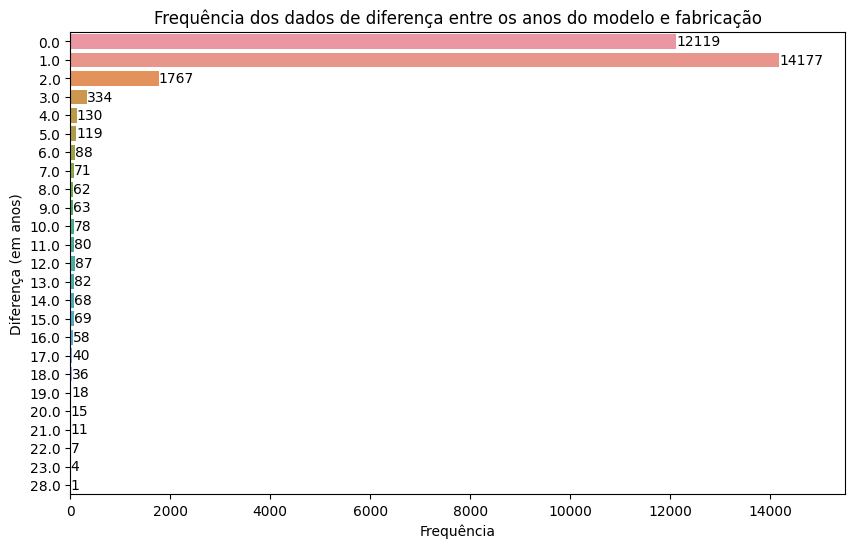

In [105]:
plt.figure(figsize= (10, 6))
ax = sns.barplot(data= frequencia_diferenca_de_anos, x= 'frequencia', y= 'diferenca')
ax.set_title('Frequência dos dados de diferença entre os anos do modelo e fabricação')

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Diferença (em anos)')
ax.set_xlabel('Frequência')
ax.set_xlim([0, 15500])
plt.show()

> Analisando o gráfico é possível perceber que há no *dataset* carros com **diferença entre o ano do modelo e de fabricação maior do que 20 anos!** O usual na indústria de automóveis é que um carro de determinado modelo seja fabricado pelo menos um ano antes.
>
> Portanto, é bastante provável que tenha ocorrido algum tipo de erro ao colocar esses dados no *dataset*.

In [106]:
# Os dados de veículos com mais de 1 ano de diferença são removidos do dataset:

train_data = train_data.query('diferenca_modelo_fabricacao <= 1')

In [107]:
# Dimensões do dataframe após a remoção:

train_data.shape

(26296, 30)

### **Estatísticas após remoção dos dados**

In [108]:
train_data.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco,diferenca_modelo_fabricacao
count,26123.000000,26296.000000,26296.000000,26296.000000,26296.000000,0.0,2.629600e+04,26296.000000
mean,10.321556,2017.682651,2018.221783,53787.389945,3.946874,NaN,1.374157e+05,0.539131
std,3.477034,2.408380,2.438430,29193.317101,0.320841,NaN,8.234098e+04,0.498476
min,8.000000,1997.000000,1997.000000,100.000000,2.000000,NaN,1.401165e+04,0.000000
25%,8.000000,2016.000000,2017.000000,29342.250000,4.000000,NaN,8.042705e+04,0.000000
50%,8.000000,2018.000000,2018.000000,52006.000000,4.000000,NaN,1.185913e+05,1.000000
75%,14.000000,2020.000000,2020.000000,77194.250000,4.000000,NaN,1.686003e+05,1.000000
max,21.000000,2022.000000,2022.000000,217636.000000,4.000000,NaN,1.349748e+06,1.000000


## 5.1.2. Distribuição dos dados das variáveis numéricas

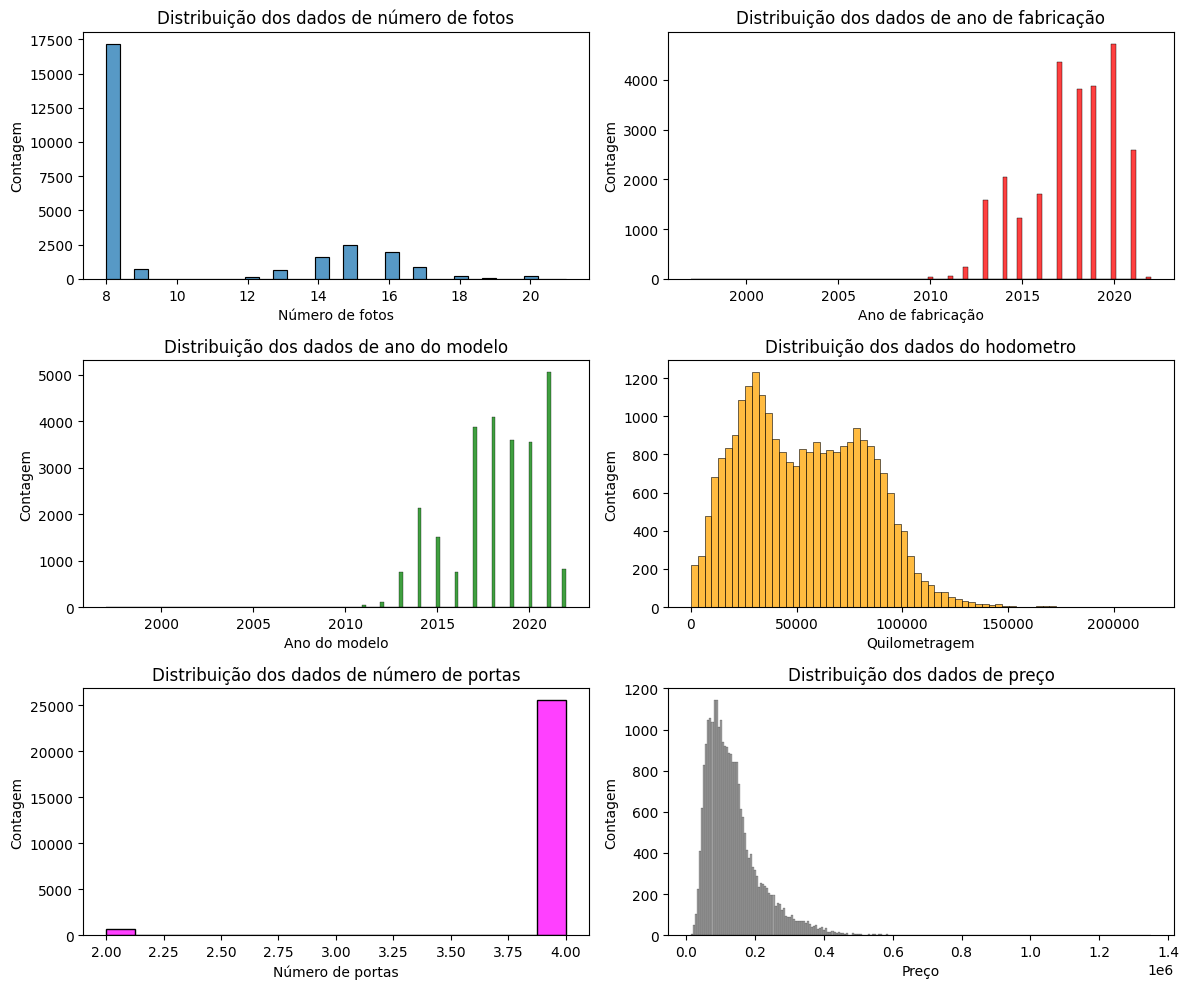

In [109]:
fig, ax = plt.subplots(3, 2, figsize= (12, 10))

ax1 = sns.histplot(data= train_data, x= 'num_fotos', ax= ax[0, 0])
ax1.set_title('Distribuição dos dados de número de fotos')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Número de fotos')
ax2 = sns.histplot(data= train_data, x= 'ano_de_fabricacao', color= 'red', ax= ax[0, 1])
ax2.set_title('Distribuição dos dados de ano de fabricação')
ax2.set_ylabel('Contagem')
ax2.set_xlabel('Ano de fabricação')
ax3 = sns.histplot(data= train_data, x= 'ano_modelo', color= 'green', ax= ax[1, 0])
ax3.set_title('Distribuição dos dados de ano do modelo')
ax3.set_ylabel('Contagem')
ax3.set_xlabel('Ano do modelo')
ax4 = sns.histplot(data= train_data, x= 'hodometro', color= 'orange', ax= ax[1, 1])
ax4.set_title('Distribuição dos dados do hodometro')
ax4.set_ylabel('Contagem')
ax4.set_xlabel('Quilometragem')
ax5 = sns.histplot(data= train_data, x= 'num_portas', color= 'magenta', ax= ax[2, 0])
ax5.set_title('Distribuição dos dados de número de portas')
ax5.set_ylabel('Contagem')
ax5.set_xlabel('Número de portas')
ax6 = sns.histplot(data= train_data, x= 'preco', color= 'gray', ax= ax[2, 1])
ax6.set_title('Distribuição dos dados de preço')
ax6.set_ylabel('Contagem')
ax6.set_xlabel('Preço')
plt.tight_layout()
plt.show()

O uso do histograma é importante para visualizar a **distribuição de frequência dos dados**. Normalmente é usado para variáveis numéricas contínuas, mas também vai ser útil para as variáveis numéricas discretas.

> * `num_fotos`: a maior parte dos anúncios contém 8 fotos.
> * `ano_de_fabricao`: a maior parte dos carros no *dataset* está teve sua fabricação a partir de 2010.
> * `ano_modelo`: a mesma coisa para esta variável, já que após o tratamento os carros tem diferença de no máximo 1 ano entre modelo e fabricação.
> * `hodometro`: há carros com quilometragem em um grande intervalo, no entanto a maioria dos carros anunciados tem quilometrica menor que 100 mil km.
> * `num_portas`: há modelos com dois tipos de porta, 2 ou 4 portas, sem nenhum número mais exótico. A quantidade de carros com 4 portas anunciados é bem maior.
> * `preco`: a maior parte dos carros custa até 400 mil reais, mas há carros, em quantidade muito diminuta, que chegam a custar mais de 1 milhão de reais.

É importante ressaltar que **nenhuma dessas variáveis possui distribuição normal** ou **próxima desse tipo de distribuição**.

## 5.1.3. Boxplot dos dados das variáveis numéricas

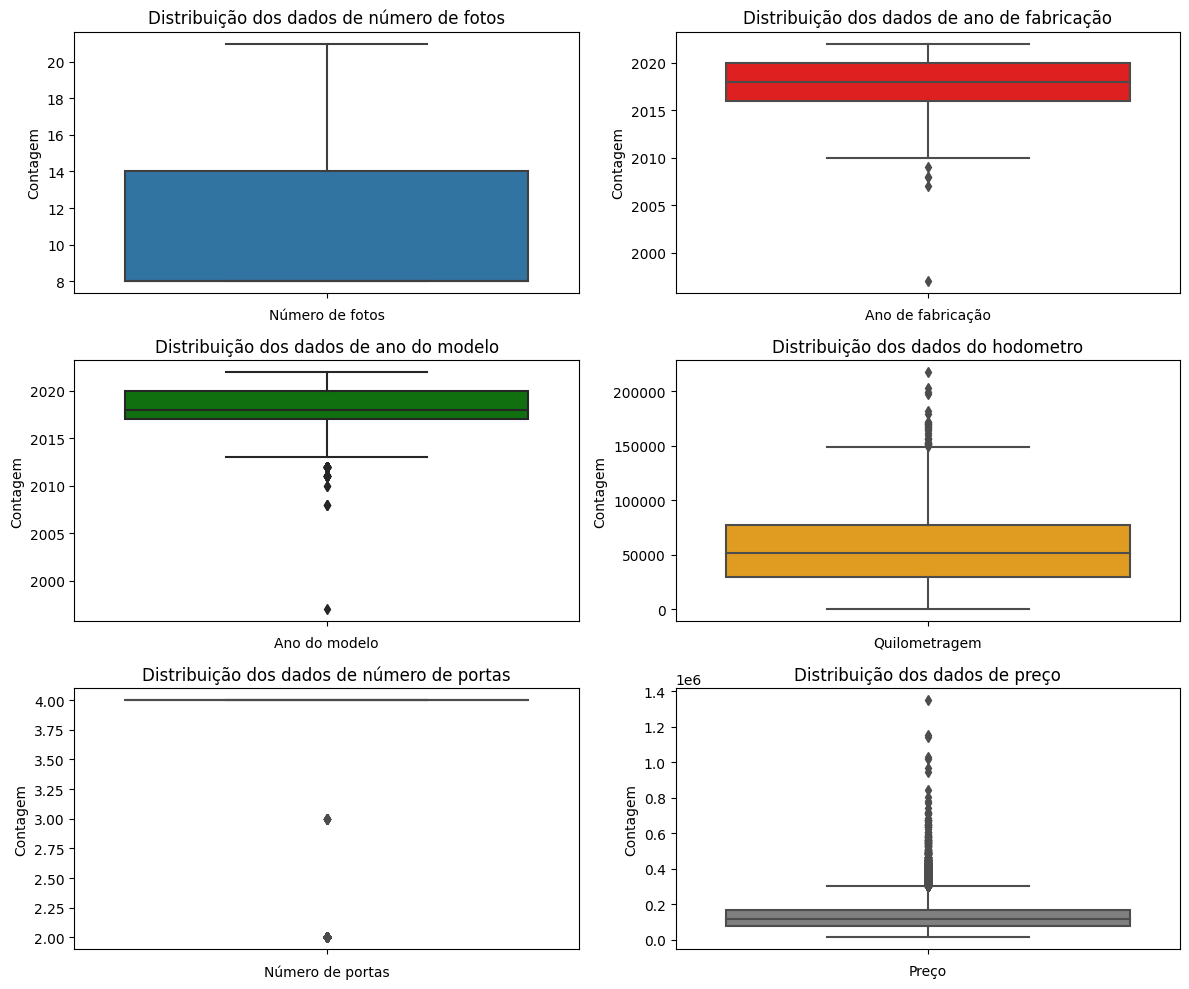

In [110]:
fig, ax = plt.subplots(3, 2, figsize= (12, 10))

ax1 = sns.boxplot(data= train_data, y= 'num_fotos', ax= ax[0, 0])
ax1.set_title('Distribuição dos dados de número de fotos')
ax1.set_ylabel('Contagem')
ax1.set_xlabel('Número de fotos')
ax2 = sns.boxplot(data= train_data, y= 'ano_de_fabricacao', color= 'red', ax= ax[0, 1])
ax2.set_title('Distribuição dos dados de ano de fabricação')
ax2.set_ylabel('Contagem')
ax2.set_xlabel('Ano de fabricação')
ax3 = sns.boxplot(data= train_data, y= 'ano_modelo', color= 'green', ax= ax[1, 0])
ax3.set_title('Distribuição dos dados de ano do modelo')
ax3.set_ylabel('Contagem')
ax3.set_xlabel('Ano do modelo')
ax4 = sns.boxplot(data= train_data, y= 'hodometro', color= 'orange', ax= ax[1, 1])
ax4.set_title('Distribuição dos dados do hodometro')
ax4.set_ylabel('Contagem')
ax4.set_xlabel('Quilometragem')
ax5 = sns.boxplot(data= train_data, y= 'num_portas', color= 'magenta', ax= ax[2, 0])
ax5.set_title('Distribuição dos dados de número de portas')
ax5.set_ylabel('Contagem')
ax5.set_xlabel('Número de portas')
ax6 = sns.boxplot(data= train_data, y= 'preco', color= 'gray', ax= ax[2, 1])
ax6.set_title('Distribuição dos dados de preço')
ax6.set_ylabel('Contagem')
ax6.set_xlabel('Preço')
plt.tight_layout()
plt.show()

O *boxplot* é um tipo de gráfico em que é possível visualizar 1º, 2º (mediana) e 3º quartis, o que ajuda a entender a distribuição dos dados, mas além disso também mostra um limite superior e inferior. Os dados fora desses limites são *outliers*, ou seja, dados que distoam dos outros.

É importante dizer que **nem todo** *outlier* **deve ser removido** do *dataset*, e isso fica mais claro analizando o *boxplot* de cada variável.

> * `ano_de_fabricao`: há carros com fabricação anterior a 2010, e isso é plausível, portanto devem ser mantidos no *dataset*.
> * `ano_modelo`: há, também, carros com modelo anterior 2012 e isso é plausível, portanto são dados significativos que não devem ser removidos.
> * `hodometro`: há carros que possuem uma quilometragem maior, destoando de outros carros, é só pensar em um motorista de aplicativo, por exemplo, portanto tais valores são estatisticamente significativos.
> * `num_portas`: aqui há percebemos que há alguns carros com 3 portas no *dataset*, o que seria muito exótico, provavelmente algum erro ao adicionar os dados.
> * `preco`: o fato de ter valores discrepantes nos dados de preço é esperado, visto que dependendo do padrão do carro é possível que existam carros realmente mais caros.

### **Carros com 3 portas**

**Quantos carros no conjunto de dados possui 3 portas?**

In [111]:
f'São {train_data.query("num_portas == 3").shape[0]} carros com 3 portas no conjunto de dados.'

'São 13 carros com 3 portas no conjunto de dados.'

In [112]:
train_data.query("num_portas == 3")

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_unico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fabrica,revisoes_dentro_agenda,veiculo_alienado,preco,diferenca_modelo_fabricacao
734,63833503557727963117144856024451837146,15.0,FIAT,DUCATO,2.3 MULTIJET DIESEL MAXICARGO MANUAL,2019,2020.0,25359.0,Manual,3,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163758.616520,1.0
791,52406443374972496219439907843051712946,14.0,VOLKSWAGEN,SAVEIRO,1.6 CROSS CE 16V FLEX 2P MANUAL,2015,2016.0,95656.0,Manual,3,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125619.258582,1.0
2660,209052999009686863855587096190582220393,8.0,RENAULT,SANDERO,1.6 16V SCE FLEX STEPWAY MANUAL,2017,2018.0,80189.0,Manual,3,...,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,61088.508200,1.0
4411,208623035278673781563602245202263825307,13.0,TOYOTA,HILUX,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,2014,2015.0,89398.0,Automática,3,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,112589.345348,1.0
4744,153869601246488237757646603931314191918,13.0,MERCEDES-BENZ,C 250,2.0 CGI SPORT COUPÉ TURBO 16V GASOLINA 2P AUTO...,2014,2014.0,90637.0,Automática,3,...,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,179691.611215,0.0
10280,85845649841718341065084593901278322825,8.0,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,2019,2020.0,45360.0,Manual,3,...,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,51710.916072,1.0
14624,16722563716672609784813377714490237093,9.0,RENAULT,DUSTER OROCH,2.0 16V FLEX DYNAMIQUE 4P MANUAL,2017,2017.0,88432.0,Manual,3,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31285.120127,0.0
14941,38229518252327319441116831975490733563,8.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2018,2019.0,57878.0,Manual,3,...,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,65706.495894,1.0
16065,64608241493028536539563900083536002741,8.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2020,2020.0,54991.0,Manual,3,...,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,39610.579686,0.0
20108,290866845362951841071117697348697394774,14.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2017,2017.0,126665.0,Manual,3,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84390.108227,0.0


Não é nada usual carros com 3 portas. Portanto, por ser um valor exótico, provavelmente foram valores inseridos erroneamente. Logo, serão retirados.

In [113]:
# Remoção desses dados do dataset:

train_data = train_data.query('num_portas != 3')

In [114]:
# Estatísticas da variável após remoção:

train_data['num_portas'].describe()

count    26283.000000
mean         3.947342
std          0.320229
min          2.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: num_portas, dtype: float64

### **Carros com valores discrepantes**

O *boxplot* da variável *target* `preco` mostra *outliers* somente além do limite superior. Para identificar esse limite e selecionar esses dados é preciso calculá-lo já que apenas pela visualização do gráfico isso não é possível.

Cálcula-se o **intervalo interquartil (IQR):**
> $IQR = 3º quartil - 1º quartil$

E o limite superior pela equação:
> $superior = 3º quartil + (1,5 * IQR)$

In [115]:
# Variável preço:

preco = train_data['preco']

# Cálculo do IQR e do limite superior:

IQR = preco.quantile(0.75) - preco.quantile(0.25)
superior = preco.quantile(0.75) + (IQR * 1.5)

print(f'Limite superior = {superior}')

Limite superior = 300876.1769313409


In [116]:
# Selecionam-se os carros com preços além desse limite:

carros_preco_discrepante = train_data.query('preco > @superior')

#### **Marcas dos carros**

In [117]:
# Valores únicos para variável marca:

carros_preco_discrepante['marca'].unique()

array(['PORSCHE', 'MERCEDES-BENZ', 'BMW', 'LAND ROVER', 'AUDI', 'VOLVO',
       'RAM', 'LEXUS', 'VOLKSWAGEN', 'TOYOTA', 'TROLLER', 'MITSUBISHI',
       'JAGUAR', 'FORD', 'FIAT', 'JEEP', 'CHEVROLET', 'NISSAN', 'KIA',
       'HYUNDAI', 'MASERATI', 'MINI'], dtype=object)

> Algumas marcas como *Porsche*, *Mercedes-Benz*, *BMW* e *Land Rover*, mas não apenas elas comercializam automóveis de mais alto padrão. Portanto, esses dados discrepantes são estatisticamente relevantes.

## 5.2. Análise das variáveis categóricas

### **Marcas de carros mais frequentes no *dataset***

In [118]:
# Series com as 10 marcas mais frequentes no conjunto de dados:

marcas_mais_frequentes = train_data['marca'].value_counts().head(10)

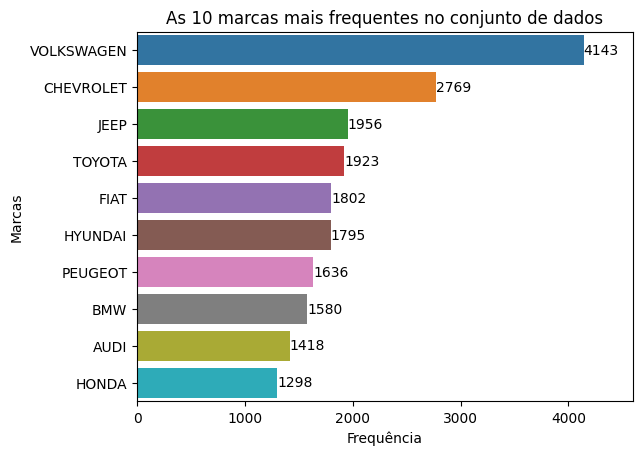

In [119]:
ax = sns.barplot(x= marcas_mais_frequentes.values, y= marcas_mais_frequentes.keys())
ax.set_title('As 10 marcas mais frequentes no conjunto de dados')

# Adiciona um rótulo para cada barra do gráfico:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Marcas')
ax.set_xlabel('Frequência')
ax.set_xlim([0, 4600])
plt.show()

> O gráfico mostra as **dez** marcas mais comuns no conjunto de dados, entre elas estão *Volkswagen*, *Chevrolet*, *Fiat*, *Hyundai*, mas também outras com carros de maior preço como *BMW*, *AUDI* e *Jeep*.

### **Modelos de carros mais frequentes no *dataset***

In [120]:
# Series com os 20 modelos mais frequentes no conjunto de dados:

modelos_mais_frequentes = train_data['modelo'].value_counts().head(20)

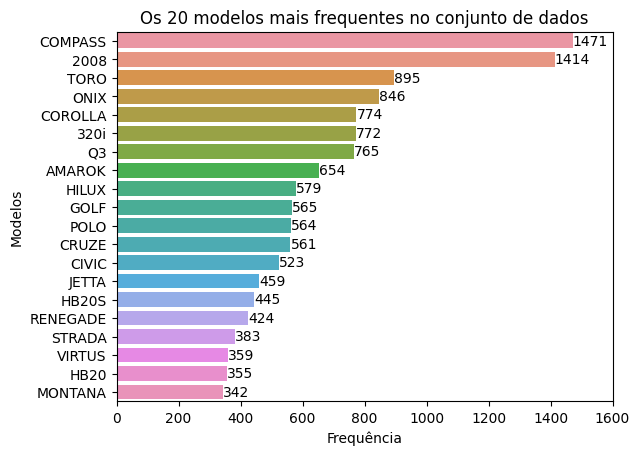

In [121]:
ax = sns.barplot(x= modelos_mais_frequentes.values, y= modelos_mais_frequentes.keys())
ax.set_title('Os 20 modelos mais frequentes no conjunto de dados')

# Adiciona um rótulo para cada barra do gráfico:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Modelos')
ax.set_xlabel('Frequência')
ax.set_xlim([0, 1600])
plt.show()

> Entre os modelos mais frequente no *dataset* estão carros populares como *HB20S*, *ONIX*, *HB20*, *GOLF*, *POLO*, mas também carros de maior preço como *HILUX*, *AMAROK* e outros. Além disso, os tipos dos carros são diversos.

### **Outras variáveis categóricas**

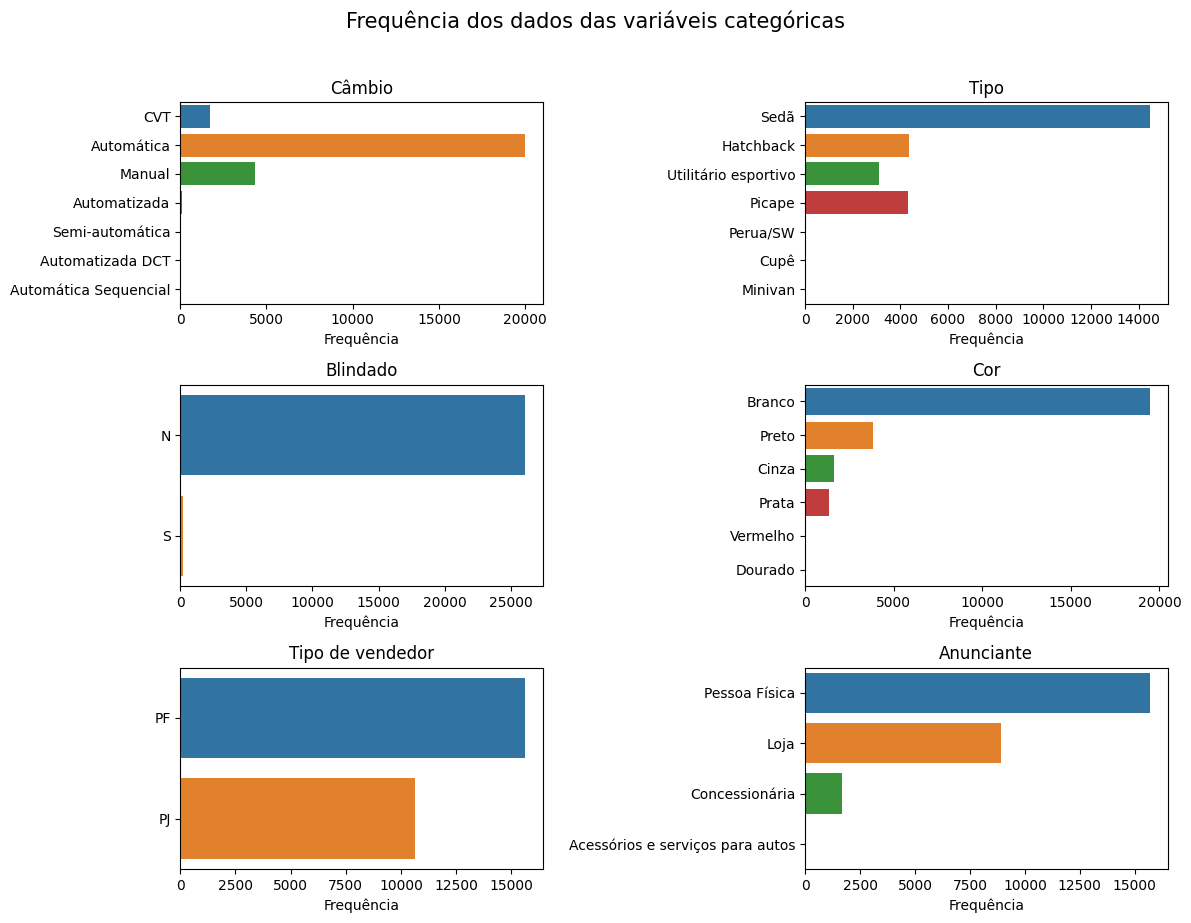

In [122]:
fig, ax = plt.subplots(3, 2, figsize= (12, 9))
plt.suptitle('Frequência dos dados das variáveis categóricas', fontsize= 15, y= 1.02)

ax1 = sns.countplot(data= train_data, y= 'cambio', ax= ax[0, 0])
ax1.set_title('Câmbio')
ax1.set_ylabel('')
ax1.set_xlabel('Frequência')
ax2 = sns.countplot(data= train_data, y= 'tipo', ax= ax[0, 1])
ax2.set_title('Tipo')
ax2.set_ylabel('')
ax2.set_xlabel('Frequência')
ax3 = sns.countplot(data= train_data, y= 'blindado', ax= ax[1, 0])
ax3.set_title('Blindado')
ax3.set_ylabel('')
ax3.set_xlabel('Frequência')
ax4 = sns.countplot(data= train_data, y= 'cor', ax= ax[1, 1])
ax4.set_title('Cor')
ax4.set_ylabel('')
ax4.set_xlabel('Frequência')
ax5 = sns.countplot(data= train_data, y= 'tipo_vendedor', ax= ax[2, 0])
ax5.set_title('Tipo de vendedor')
ax5.set_ylabel('')
ax5.set_xlabel('Frequência')
ax6 = sns.countplot(data= train_data, y= 'anunciante', ax= ax[2, 1])
ax6.set_title('Anunciante')
ax6.set_ylabel('')
ax6.set_xlabel('Frequência')
plt.tight_layout()
plt.show()

> * `cambio`: os carros automáticos estão em maior quantidade que carros com câmbio manual.
> * `tipo`: os carros sedã são os mais frequentes.
> * `blindado`: são poucos os carros blindados à venda no *dataset*.
> * `cor`: carros brancos são os mais comuns no conjunto de dados, porém preto, cinza e prata também são populares.
> * `tipo_vendedor`: a maior parte dos vendedores é pessoa física, mas pessoas jurídicas também são frequentes.
> * `anunciante`: maior parte dos anunciantes é pessoa física, seguido de loja e concessionária.

### **Variáveis categóricas com dados faltantes**

As colunas `ipva_pago` e `dono_aceita_troca` apresentam cerca de 30% de valores faltantes cada.

In [123]:
# Contagem dos valores para dono_aceita_troca sem desconsiderar os valores missing:

train_data['dono_aceita_troca'].value_counts(dropna= False)


Aceita troca    19262
NaN              7021
Name: dono_aceita_troca, dtype: int64

In [124]:
# Contagem dos valores para ipva_pago sem desconsiderar os valores missing:

train_data['ipva_pago'].value_counts(dropna= False)

IPVA pago    17685
NaN           8598
Name: ipva_pago, dtype: int64

> Em ambos os casos parece ser que existem duas opções: **sim ou não.** No entanto, só as opções afirmativas estão presentes. Uma hipótese é que valores *missing* deveriam ser dados negativos, porém sem qualquer evidência e sem conhecer como os dados foram persistidos, tal hipótese não pode ser facilmente comprovada.

### **Variáveis booleanas**

In [125]:
# As variáveis booleanas no conjunto de dados é:

train_data.select_dtypes('bool').columns

Index(['entrega_delivery', 'troca', 'elegivel_revisao'], dtype='object')

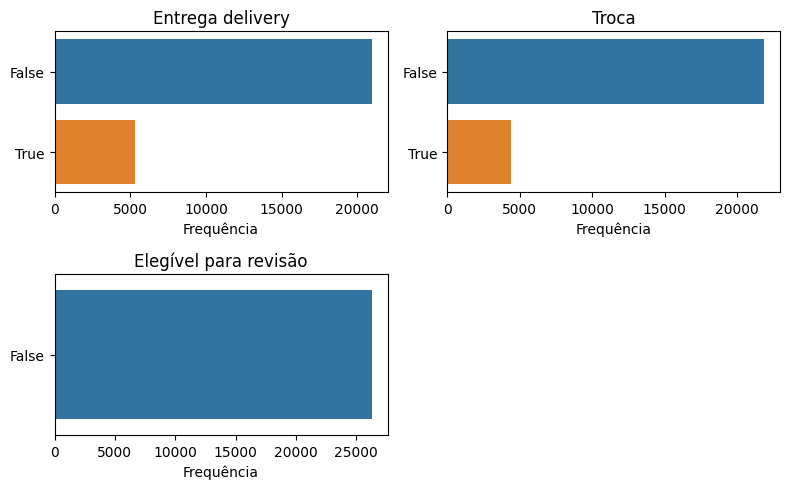

In [126]:
fig, ax = plt.subplots(2, 2, figsize= (8, 5))

ax1 = sns.countplot(data= train_data, y= 'entrega_delivery', ax= ax[0, 0])
ax1.set_title('Entrega delivery')
ax1.set_ylabel('')
ax1.set_xlabel('Frequência')
ax2 = sns.countplot(data= train_data, y= 'troca', ax= ax[0, 1])
ax2.set_title('Troca')
ax2.set_ylabel('')
ax2.set_xlabel('Frequência')
ax3 = sns.countplot(data= train_data, y= 'elegivel_revisao', ax= ax[1, 0])
ax3.set_title('Elegível para revisão')
ax3.set_ylabel('')
ax3.set_xlabel('Frequência')
ax[1, 1].remove()
plt.tight_layout()
plt.show()

> As classes para as variáveis `entrega_delivery` e `troca` são desbalanceadas, com mais *False* do que *True*.
> A coluna `elegivel_revisao` contém apenas *False*, **o que torna essa coluna pouco relevante para a modelagem dos dados.**

## 5.3. Análise de como as variáveis afetam o preço

### **Como a quilometragem afeta o preço dos carros?**

Como a comparação é feita com duas variáveis numéricas, nessa e em outras análises o **gráfico de dispersão** é o ideal.

> **Gráfico dispersão** dispõe as variáveis em coordenadas de forma a mostrar a dispersão dos valores do conjunto de dados. É importante para identificar padrões e correlações.

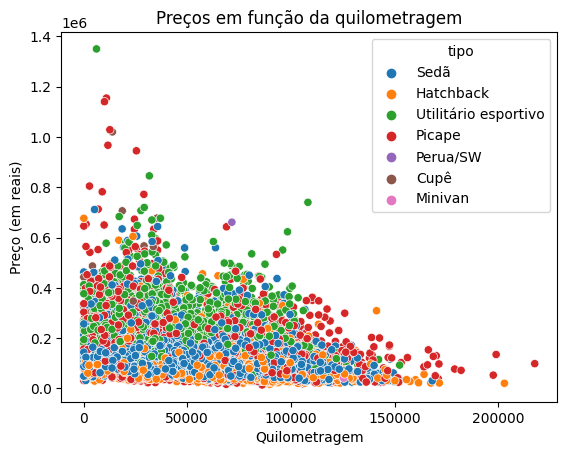

In [127]:
ax = sns.scatterplot(data= train_data, x= 'hodometro', y= 'preco', hue= 'tipo')
ax.set_title('Preços em função da quilometragem')
ax.set_ylabel('Preço (em reais)')
ax.set_xlabel('Quilometragem')
plt.show()

> É possível identificar o que já é intuitivo, carros com maior quilometragem têm menor preço. Ou seja, a correlação entre as duas variáveis é negativa.

# 6. Hipóteses de negócio

## **Hipótese 1 - Qual a melhor escolha para quem quer pagar menos, *hatchback* ou sedã?**

In [128]:
# Seleciona-se apenas os veículos do tipo hatchback e sedã:

hatchback_seda = train_data.query('tipo == "Sedã" or tipo == "Hatchback"')

In [129]:
# Algumas estatísticas para cada tipo de veículo:

hatchback_seda.groupby('tipo')['preco'].agg(['mean', 'median', 'std'])

,mean,median,std
tipo,,,
Hatchback,93879.677932,79459.254547,55215.983954
Sedã,122210.299085,111993.265333,58891.332490


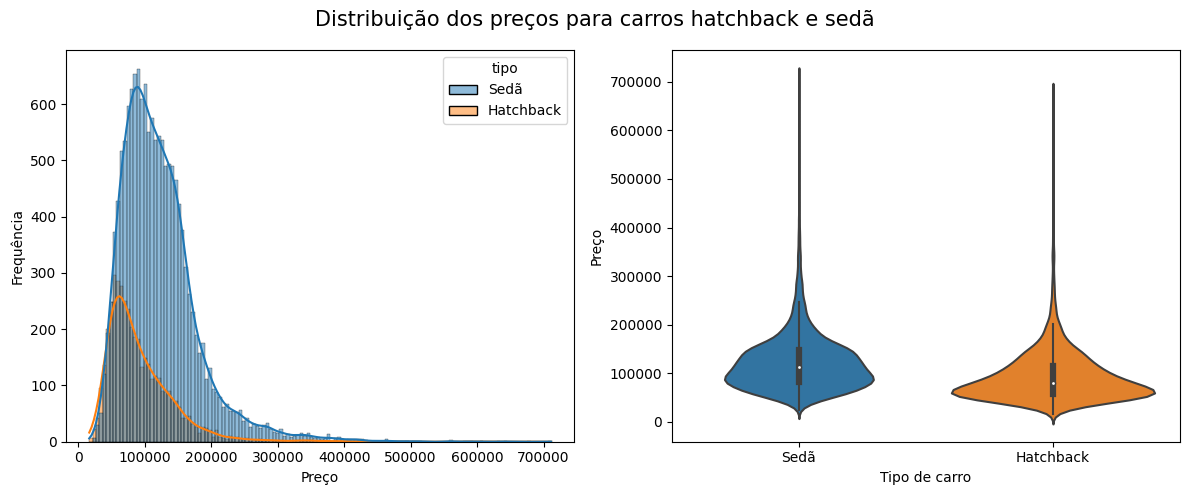

In [130]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
fig.suptitle('Distribuição dos preços para carros hatchback e sedã', fontsize= 15)

ax1 = sns.histplot(data= hatchback_seda, x= 'preco', hue= 'tipo', kde= True, ax= ax[0])
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Preço')
ax2 = sns.violinplot(data= hatchback_seda, x= 'tipo', y= 'preco', ax= ax[1])
ax2.set_ylabel('Preço')
ax2.set_xlabel('Tipo de carro')
plt.tight_layout()
plt.show()

> Analisando o histograma e gráfico de violino, percebe-se que os preços dos dois tipos de carros (*hatchback* e sedã) não seguem uma mesma distribuição.
>
> Como nenhum dos grupos têm preços seguindo uma distribuição normal, a média não é uma boa medida de tendência central, sendo melhor comparar as suas medianas.
>
> Portanto, comparando os gráficos é possível concluir que os carros **sedã** são mais caros que os *hatchbak*. Pois, a cauda direita do histograma mostra que ela atinge valores maiores de preço, e com maior frequência, assim como o seu gráfico de violino mostra isso, mas também que a mediana dos preços dos veículos **sedã** se encontram em um patamar maior.

## **Hipótese 2 - Os preços praticados por vendedores pessoa física e pessoa jurídica são diferentes?**

In [131]:
train_data.groupby('tipo_vendedor')['preco'].agg(['mean', 'median', 'std'])

,mean,median,std
tipo_vendedor,,,
PF,144805.586638,125318.249166,85020.560106
PJ,126596.208009,109213.728696,76994.036097


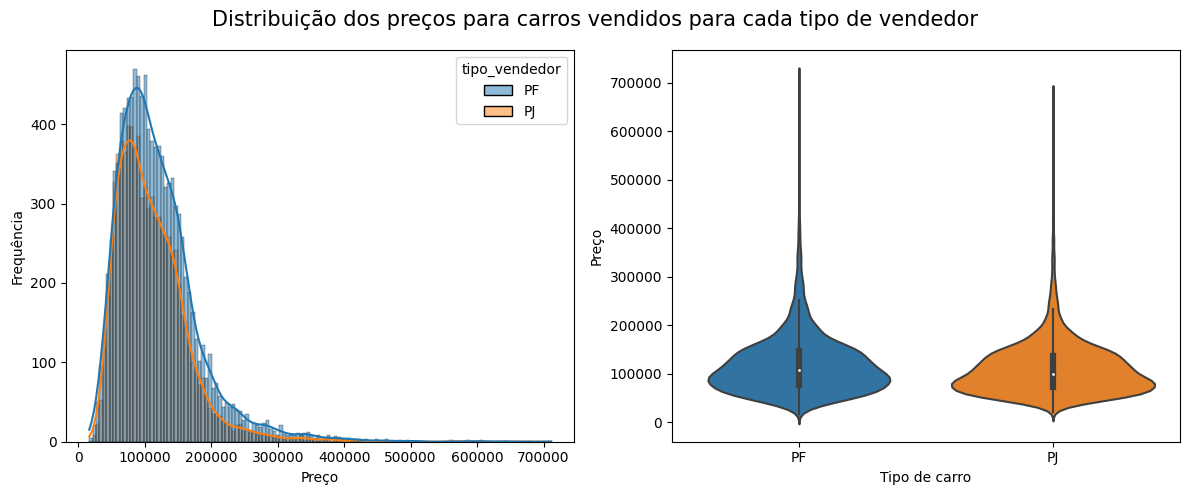

In [132]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
fig.suptitle('Distribuição dos preços para carros vendidos para cada tipo de vendedor', fontsize= 15)

ax1 = sns.histplot(data= hatchback_seda, x= 'preco', hue= 'tipo_vendedor', kde= True, ax= ax[0])
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Preço')
ax2 = sns.violinplot(data= hatchback_seda, x= 'tipo_vendedor', y= 'preco', ax= ax[1])
ax2.set_ylabel('Preço')
ax2.set_xlabel('Tipo de carro')
plt.tight_layout()
plt.show()

> As distribuições dos preços praticados por vendedores **pessoa física** parece maior que os preços praticados por **pessoa jurídica.** Além disso, o histograma mostra que esses dados não seguem uma distribuição normal.

Para testar tal hipótese, pode-se realizar o teste não paramétrico de *Mann-Whitney U* já que não se verificou a normalidade dos dados, isso faz com que as medianas sejam comparadas e não as médias. As hipóteses testadas são:

$Me_1 →$ mediana dos preços praticados pelos vendedores pessoa física.

$Me_2 →$ mediana dos preços praticados pelos vendedores pessoa jurídica.
> $H_0: Me_1 \leq Me_2$
>
> $H_1: Me_1 > Me_2$

In [133]:
# Amostras:

vendedores_pf = train_data.query('tipo_vendedor == "PF"')['preco']
vendedores_pj = train_data.query('tipo_vendedor == "PJ"')['preco']

In [134]:
# Teste não-paramétrico de Mann-Whitney:

stats, pvalue = mannwhitneyu(vendedores_pf, vendedores_pj, alternative= 'greater')
print(f'Estatística de teste = {stats}')
print(f'P-valor = {pvalue}')

Estatística de teste = 94763178.0
P-valor = 1.088238319438996e-81


Para rejeitar a hipótese nula ($H_0$) é necessário que $Pvalor \leq \alpha$. O nível de significância ($\alpha$) normalmente é definido como 0,05, isto é, 5%.

In [135]:
pvalue <= 0.05

True

> Portanto, a hipótese nula é **rejeitada**, ou seja, existem evidências estatísticas para indicar que a **mediana dos preços** dos carros comercializados por vendedores pessoa física **é maior** que a mediana dos preços comercializados por pessoa jurídica.

## **Hipótese 3 - Carros com câmbio manual são a melhor escolha para quem quer gastar pouco?**

In [136]:
train_data.groupby('cambio')['preco'].agg(['mean', 'median', 'std'])

,mean,median,std
cambio,,,
Automatizada,132633.239158,101916.968276,97468.690243
Automatizada DCT,202938.368645,183628.260145,118019.268320
Automática,150963.263622,130757.692721,85285.361738
Automática Sequencial,65731.953829,65061.417860,29568.005417
CVT,116521.626953,112573.296112,42292.914911
Manual,83237.301517,69157.855388,48518.848024
Semi-automática,87915.674050,71843.578838,50060.581766


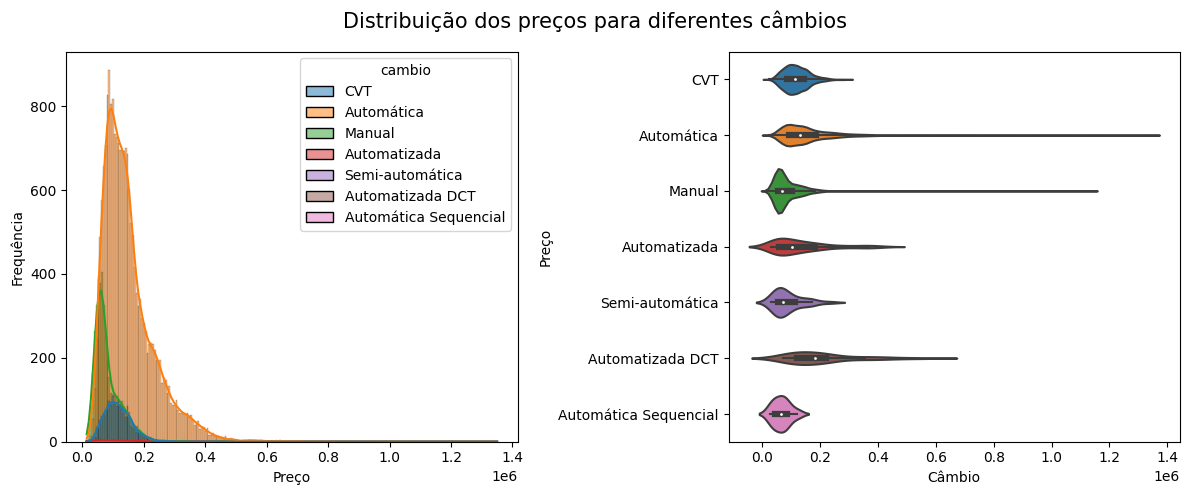

In [137]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))
fig.suptitle('Distribuição dos preços para diferentes câmbios', fontsize= 15)

ax1 = sns.histplot(data= train_data, x= 'preco', hue= 'cambio', kde= True, ax= ax[0])
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Preço')
ax2 = sns.violinplot(data= train_data, y= 'cambio', x= 'preco', ax= ax[1])
ax2.set_ylabel('Preço')
ax2.set_xlabel('Câmbio')
plt.tight_layout()
plt.show()

> Os valores das medianas para carros manuais, com câmbio automático sequencial e semi-automático são próximos. Além disso, a distribuição dos dados tem suas semelhanças, como é possível ver no gráfico de violino.

Para comparar as medianas desses três grupos, já que seus dados não seguem uma distribuição normal, é possível realizar o teste não-paramétrico de *Kruskal-Wallis*.

> $H_0:$ As medianas dos grupos são iguais.
>
> $H_1:$ Pelo menos uma das medianas dos grupos é diferente.

In [138]:
# Amostras:

automatica_sequencial = train_data.query('cambio == "Automática Sequencial"')['preco']
manual = train_data.query('cambio == "Manual"')['preco']
semi_automatica = train_data.query('cambio == "Semi-automática"')['preco']

In [139]:
stats, pvalue = kruskal(semi_automatica, automatica_sequencial, manual)
print(f'Estatística de teste = {stats}')
print(f'P-valor = {pvalue}')

Estatística de teste = 1.1089870563137083
P-valor = 0.5743630862738028


Para rejeitar a hipótese nula ($H_0$) é necessário que $Pvalor \leq \alpha$. O nível de significância ($\alpha$) normalmente é definido como 0,05, isto é, 5%.

In [140]:
pvalue <=  0.05

False

> Portanto, **não há evidências estatísticas suficientes para rejeitar a hipótese nula**. Ou seja, as medianas dos três grupos são as mesmas. Portanto, para decidir se um carro com câmbio manual deve ser comprado, o cliente não deve levar em conta apenas o preço.

## **Hipótese A - Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

Para definir carro popular é possível usar como base os preços praticados em determinado ano. Sabe-se que o ano de fabricação mais recente é 2022.

Definem-se como marcas populares aquelas com modelos dentro dessa categoria e carros que custam menos de R$ 80.000,00. Tal preço é próximo ao preço médio praticado para esse tipo de carro.

In [141]:
# Marcas com modelos populares:

marcas_populares = ['HYUNDAI', 'VOLKSWAGEN', 'CHEVROLET', 'FORD', 'FIAT', 'RENAULT', 'TOYOTA', 'PEUGEOT', 'CITROËN']

In [142]:
# Selecionam-se os carros que custam até 80 mil:

carros_populares = train_data.query('marca in @marcas_populares and preco <= 80000')

In [143]:
# Determina-se o preço médio para essa categoria de carros por estado:

preco_medio_populares_por_estado = carros_populares.groupby('estado_vendedor')['preco'].mean()

# E o número de carros nessa categoria anunciados:

carros_populares_por_estado = carros_populares['estado_vendedor'].value_counts()

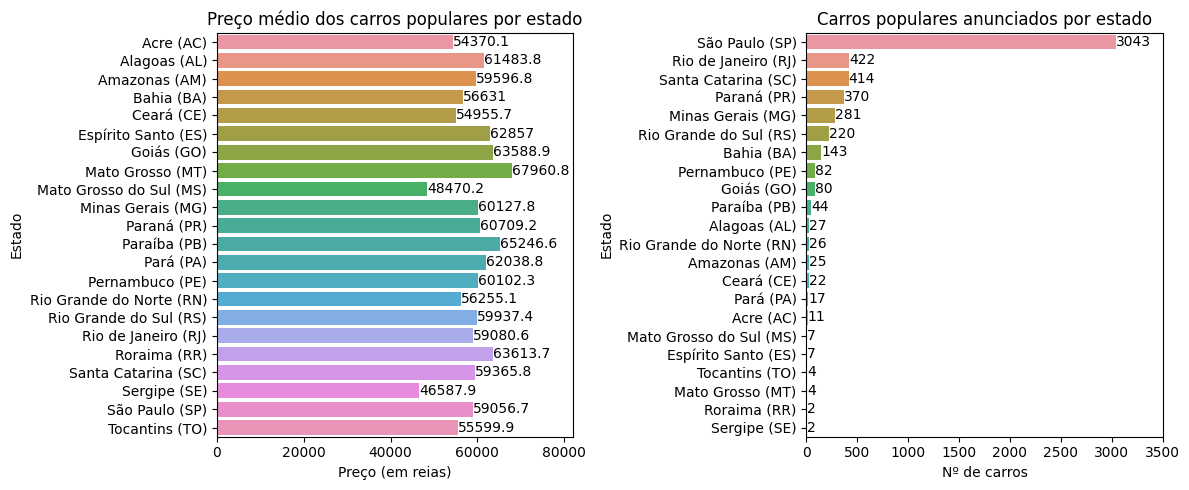

In [144]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))

# Gráfico de barras com o preço médio por estado:

ax1 = sns.barplot(x= preco_medio_populares_por_estado.values, y= preco_medio_populares_por_estado.keys(), ax= ax[0])
ax1.set_title('Preço médio dos carros populares por estado')

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge')

ax1.set_ylabel('Estado')
ax1.set_xlabel('Preço (em reias)')
ax1.set_xlim([0, 82000])

# Gráfico de barras com anúncios de carros populares por estado:

ax2 = sns.barplot(x= carros_populares_por_estado.values, y= carros_populares_por_estado.keys(), ax= ax[1])
ax2.set_title('Carros populares anunciados por estado')

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge')

ax2.set_ylabel('Estado')
ax2.set_xlabel('Nº de carros')
ax2.set_xlim([0, 3500])
plt.tight_layout()
plt.show()

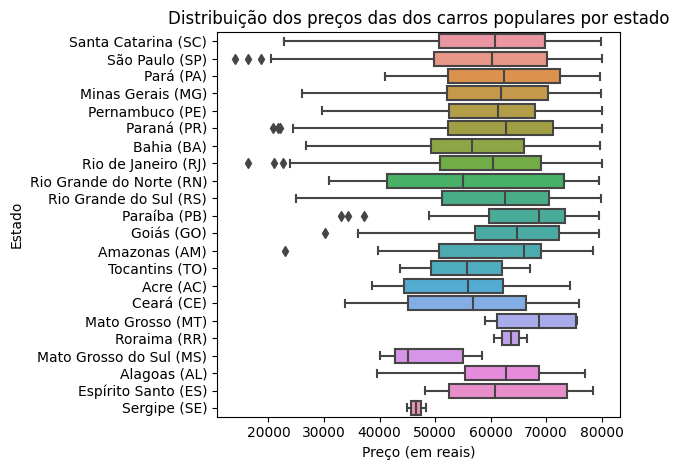

In [145]:
# Boxplot com os preços dos carros populares por estado:

ax = sns.boxplot(data= carros_populares, x= 'preco', y= 'estado_vendedor')
ax.set_title('Distribuição dos preços das dos carros populares por estado')
ax.set_ylabel('Estado')
ax.set_xlabel('Preço (em reais)')
plt.tight_layout()
plt.show()

O melhor estado para vender veículos de marca popular é **São Paulo!** Isso deve a:

> **1.** Maior mercado, é o estado com maior quantidade de anúncios. Ou seja, deve existir maior demanda.
>
> **2.** A distribuição mostra que os carros vendidos estão nas mais diferentes faixas de preço. Portanto, há opções para diferentes públicos, o que também é vantajoso para o vendedor.
>
> **3.** Os preços praticados em **São Paulo** não são os mais baixos, estando em linha com a precificação média dos outros estados.

## **Hipótese B - Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?**


In [146]:
# Apenas os dados referentes a picapes de câmbio automático são selecionados:

picapes_automaticas = train_data.query('tipo == "Picape" and cambio == "Automática"')

In [147]:
# Instancia-se um dataframe com os preços médios das picapes automáticas por estado:

preco_medio_picape_por_estado = pd.DataFrame(picapes_automaticas.groupby('estado_vendedor')['preco'].mean())

# E outro dataframe com o número de vendedores por estado:

anuncios_por_estado = pd.DataFrame(picapes_automaticas['estado_vendedor'].value_counts())

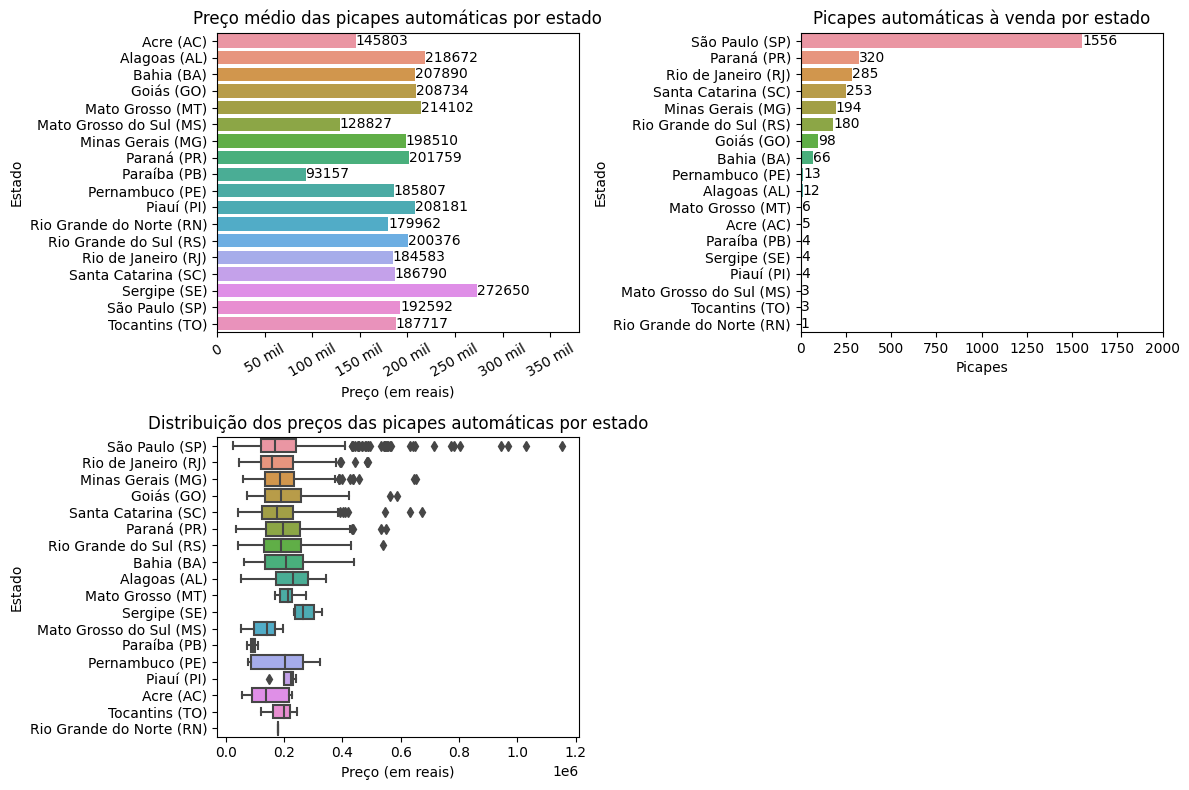

In [148]:
fig, ax = plt.subplots(2, 2, figsize= (12, 8))

# Barplot com preços médios das picapes automáticas:

ax1 = sns.barplot(x= preco_medio_picape_por_estado['preco'], y= preco_medio_picape_por_estado.index, ax= ax[0, 0])

# Coloca um rótulo com o preço médio em cada barra do gráfico:

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge')

ax1.set_title('Preço médio das picapes automáticas por estado')
ax1.set_ylabel('Estado')
ax1.set_xlabel('Preço (em reais)')
ax1.set_xticklabels(['0', '50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil'], rotation= 30)
ax1.set_xlim([0, 380000]) # intervalo do eixo x.

# Barplot com número de vendedores com picapes automáticas para cada estado:

ax2 = sns.barplot(x= anuncios_por_estado['estado_vendedor'], y= anuncios_por_estado.index, ax= ax[0, 1])

# Coloca um rótulo com o preço médio em cada barra do gráfico:

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge')

ax2.set_title('Picapes automáticas à venda por estado')
ax2.set_ylabel('Estado')
ax2.set_xlabel('Picapes')
ax2.set_xlim([0, 2000]) # intervalo do eixo x.
ax3 = sns.boxplot(data= picapes_automaticas, x= 'preco', y= 'estado_vendedor', ax= ax[1, 0])
ax3.set_title('Distribuição dos preços das picapes automáticas por estado')
ax3.set_ylabel('Estado')
ax3.set_xlabel('Preço (em reais)')
ax[1, 1].remove()
plt.tight_layout()
plt.show()

O melhor estado para se comprar uma picape com câmbio automático é **São Paulo!**

Analisando os gráficos é possível depreender algumas informações:

> **1.** Alguns estados possuem um número, para esse tipo de carro, à venda muito reduzido, é o caso de RN, PI, TO, SE, MS, MT, PB, AC, AL e PE. O que talvez possa restringir demais as escolhas do comprador.
>
> **2.** Em muitos desses estados o preço médio das picapes automáticas é maior. Mesmo naqueles em que o preço médio é menor (AC, PB e MS) o **nº de picapes automáticas sendo vendidas é irrisório**, o que restringe as opções do comprador.
>
> **3.** Existem estados **com preço médio próximo a São Paulo** e com oferta **considerável** para esse tipo de carro, é o caso de PR, RJ, SC, mas nenhum deles tem grande variedade de preços como São Paulo. O boxplot dos preços por estado mostra para São Paulo **uma distribuição bem dispersa.** Isto é, existem picapes automáticas mais baratas, de preço moderado e mais alto padrão. Isso faz com que o comprador **tenha um leque de opções** que ele não teria, de maneira comparável, em **nenhum dos outros estados.**


## **HIPÓTESE C - Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?**


Antes de realizar a análise sobre qual estado é melhor para comprar carros que ainda estejam na garantia, é importante notar que a maior parte dos dados da coluna `garantia_de_fabrica` é de **valores faltantes.**

In [149]:
train_data['garantia_de_fabrica'].value_counts(dropna= False)

NaN                    21954
Garantia de fábrica     4329
Name: garantia_de_fabrica, dtype: int64

In [150]:
# Seleção dos carros dentro da garantia:

carros_na_garantia = train_data.query('garantia_de_fabrica == "Garantia de fábrica"')

In [151]:
# Cálculo do preço médio por estado:

preco_medio_garantia_por_estado = carros_na_garantia.groupby('estado_vendedor')['preco'].mean()

# Número de carros na garantia anunciados em cada estado:

carros_garantia_anunciados_por_estado = carros_na_garantia['estado_vendedor'].value_counts()

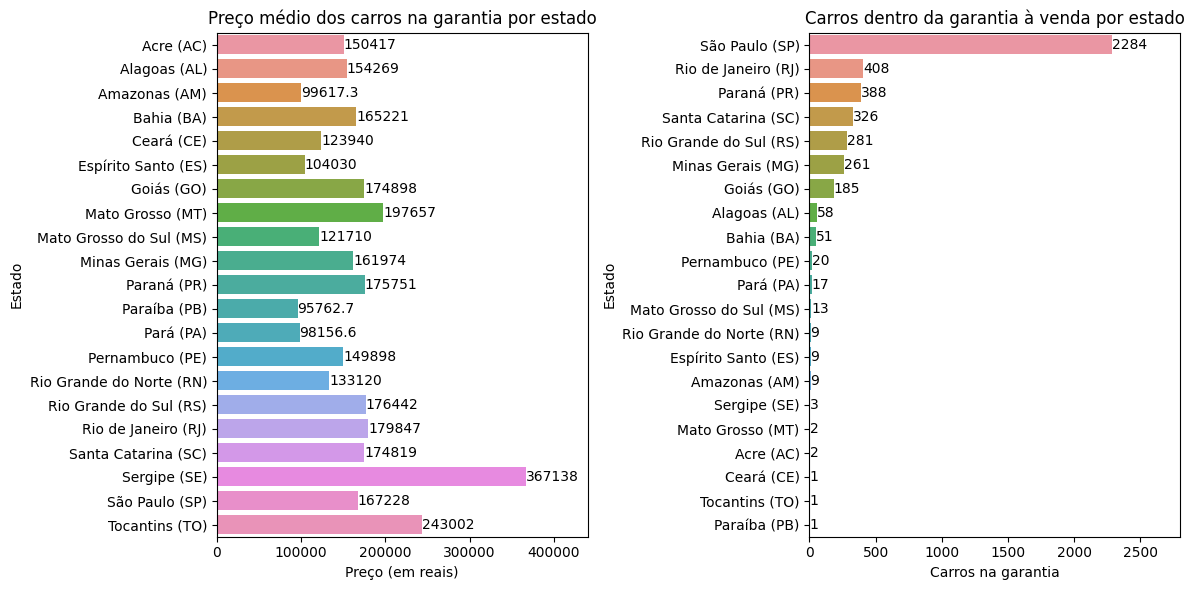

In [152]:
fig, ax = plt.subplots(1, 2, figsize= (12, 6))

# Barplot com preços médios dos carros dentro da garantia:

ax1 = sns.barplot(x= preco_medio_garantia_por_estado.values, y= preco_medio_garantia_por_estado.keys(), ax= ax[0])

# Coloca um rótulo com o preço médio em cada barra do gráfico:

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge')

ax1.set_title('Preço médio dos carros na garantia por estado')
ax1.set_ylabel('Estado')
ax1.set_xlabel('Preço (em reais)')
# ax1.set_xticklabels(['0', '100 mil', '200 mil', '300 mil', '400 mil'])
ax1.set_xlim([0, 440000]) # intervalo do eixo x.

# Barplot com número de vendedores com picapes automáticas para cada estado:

ax2 = sns.barplot(x= carros_garantia_anunciados_por_estado.values, y= carros_garantia_anunciados_por_estado.keys(), ax= ax[1])

# Coloca um rótulo com o preço médio em cada barra do gráfico:

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge')

ax2.set_title('Carros dentro da garantia à venda por estado')
ax2.set_ylabel('Estado')
ax2.set_xlabel('Carros na garantia')
ax2.set_xlim([0, 2800]) # intervalo do eixo x.
plt.tight_layout()
plt.show()

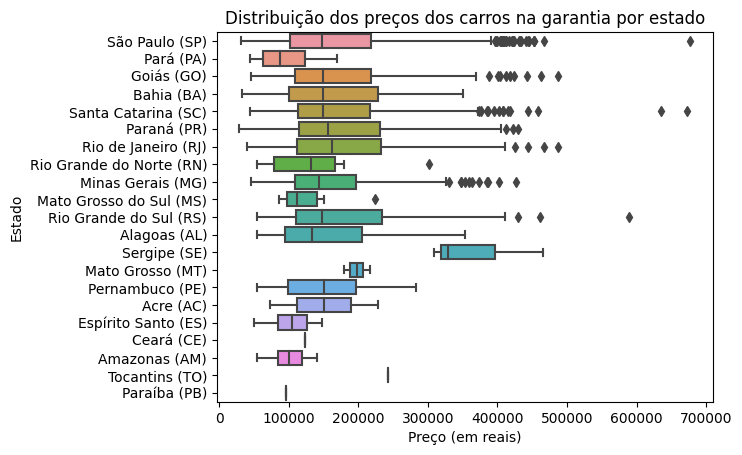

In [153]:
ax = sns.boxplot(data= carros_na_garantia, x= 'preco', y= 'estado_vendedor')
ax.set_title('Distribuição dos preços dos carros na garantia por estado')
ax.set_ylabel('Estado')
ax.set_xlabel('Preço (em reais)')
plt.show()

Levando em conta três critérios: preço médio, oferta/disponibilidade de carros e a distribuição dos preços (de carros mais baratos até mais caros):

> **1.** Os estados GO, MG, RS, SC, PR, RJ e SP são aqueles com **uma oferta maior** de carros dentro da garantia à venda.
>
> **2.** Desses estados, aqueles com uma distribuição de preços mais dispersa são: GO, SC, RJ e SP, ou seja, **o leque de opções para o comprador é maior**.
>
> **3.** Porém, observando o preço médio dentre os estados do item anterior, **o preço médio mais baixo é o de São Paulo.**

Portanto, São Paulo é, também, o melhor estado para se comprar um carro ainda na garantia.